# Task 10.9.7

To solve the following system of equations:

$\dot{y_1} = -0.04y_1 + 10^4y_2y_3$  
$\dot{y_2} = 0.04y_1 - 10^4y_2y_3 - 3\cdot10^7{y_2}^2$  
$\dot{y_3} = 3\cdot10^7{y_2}^2$ 

Importing essential libraries:

In [1]:
import numpy as np
from scipy.integrate import odeint
import pylab as plt

Writing them in the understandable for Python way:

In [2]:
def equation(y, t):
    y1, y2, y3 = y
    dydt = [-0.04 * y1 + 10000 * y2 * y3, 
           0.04 * y1 - 10000 * y2 * y3 - 30000000 * (y2 ** 2),
           30000000 * (y2 ** 2)]
    return dydt

Creating the list of integration segments:  
$T_k = 40, 100, 1000, ..., 10^{11}$

In [3]:
Ts = [40]
for i in range (2, 12):
    Ts.append(10 ** i)

Splitting segments:

In [4]:
ts = []
for T in Ts:
    ts.append(np.linspace(0, T, 100000))

Solving the system using [scipy.integrate.odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html):

In [5]:
y0 = [1., 0. , 0.]   
ys = []
for t in ts:
    sol = odeint(equation, y0, t)
    ys.append([sol[:, 0], sol[:, 1], sol[:, 2]])

/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Creating the plotter:

In [11]:
def make_plot(x, y, scale):
    ax = plt.subplot(4, 3, i + 1)
    plt.plot(x, y[0], 'g', label = 'y1 (t)')
    plt.plot(x, y[1], 'r', label = 'y2 (t)')
    plt.plot(x, y[2], 'b', label = 'y3 (t)')
    plt.legend(loc = 'best')
    plt.xlabel('t', horizontalalignment='right', x=0.9)
    plt.title('T = 40' if (Ts[i] == 40) else 'T = 10^' + str(i+1))
    plt.yscale(scale)
    plt.grid()

Plotting solution with different T values:

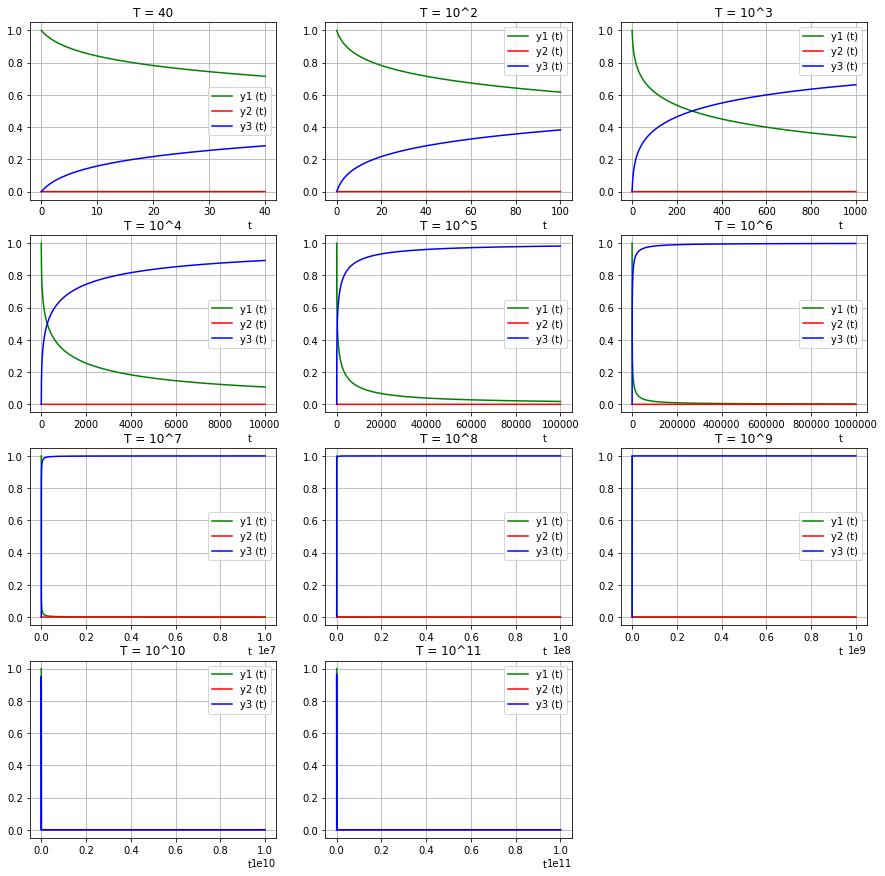

In [12]:
plt.figure(figsize=(15, 15))
for i in range(len(Ts)):
    make_plot(x=ts[i], y=ys[i], scale='linear')

Analysing these plots, we can conclude that $y_2$ always equals zero, but it is not. Let's plot with logarithmic scale:

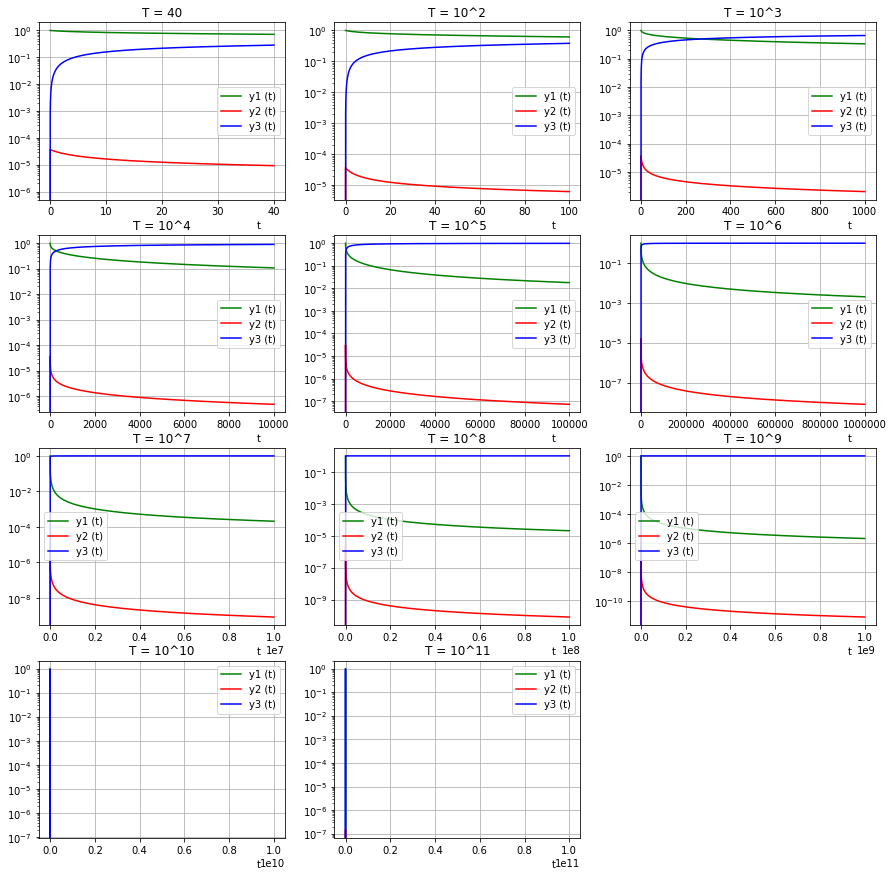

In [8]:
plt.figure(figsize=(15, 15))
for i in range(len(Ts)):
    make_plot(x=ts[i], y=ys[i], scale='log')

You can decide that some of the latest plots are not informative. Unfortunately, that's true. My computer is not powerful enough to work with such a huge segments.